# attr - Classes Without Boilerplate

`attr` should usually be used for defining classes that fall under the following criteria:
1. The class contains primitive data types or other `attr` classes
2. There will be a lot of instances of the class

As an example of using `attr`, we will implement a binary tree data structure.

As the first step, we will import `typing` and `attr`.

`typing` is a module in Python's standard library that allows to write Python with a proper type system and removes a lot of runtime surprises.

In [1]:
# Standard Library Packages
import typing

# Third-Party Packages
import attr

Next, we are going to define a `Node` class using `attr.s` [class decorator](https://www.python.org/dev/peps/pep-3129/)

`frozen=True` is used to make every instance of the class immutable which will ensure that the data structure can be used in a functional programming paradigm.

`kw_only=True` forces all of the calls to the constructor to be used with [keyword-only arguments](https://www.python.org/dev/peps/pep-3102/). This is done in order to make the code more readable.

In [2]:
ValueType = int

@attr.s(frozen=True, kw_only=True)
class Node:
    value: ValueType = attr.ib()
    left_child: typing.Optional["Node"] = attr.ib(default=None)
    right_child: typing.Optional["Node"] = attr.ib(default=None)

Let's try it out:

In [3]:
node = Node(value=0)

# Check the attributes
assert node.value == 0
assert node.left_child == None
assert node.right_child == None

# Check equality with a different instance that has the same attributes
assert node == Node(value=0)

# Modify an instance and check for inequality
new_node = attr.evolve(node, value=1)
assert new_node != node

# Check that an attribute cannot be modified without using `attr.evolve`
try:
    node.value = 1
except attr.exceptions.FrozenInstanceError as e:
    ...
    
# Check pickle support
import pickle
assert pickle.loads(pickle.dumps(node)) == node

# Check __repr__
node_as_str = "Node(value=0, left_child=None, right_child=None)"
assert f"{node}" == node_as_str
assert node == eval(node_as_str)

# Check __hash__
_ = hash(node)

As you can see above, we get serializable and hashable class that supports equality and has proper conversion to and from string out of the box

Next, let's define `BinaryTree` class:

In [4]:
@attr.s(frozen=True, kw_only=True)
class BinaryTree:
    root: typing.Optional["Node"] = attr.ib(default=None)

Let's try creating a default `BinaryTree`:

In [5]:
empty_binary_tree = BinaryTree()

Let's try creating `BinaryTree` by setting the root to `node`:

In [6]:
binary_tree = BinaryTree(root=node)

Let's see if we can evolve empty `BinaryTree` into the one initalized with `root=node`

In [7]:
assert binary_tree == attr.evolve(empty_binary_tree, root=node)

Next, let's define `insert_into_binary_tree` function and insert a few elements:

In [8]:
# `*` at the beginning of the function makes it accept keyword-only arguments
def insert_into_binary_tree(*, binary_tree: BinaryTree, value: ValueType) -> BinaryTree:
    
    new_node = Node(value=value)
    
    if binary_tree.root is None:
        return BinaryTree(root=new_node)
    
    def insert_internal(*, node: Node, new_node: Node) -> Node:
        if node.value > new_node.value:
            if node.left_child is not None:
                new_node = insert_internal(node=node.left_child, new_node=new_node)
            node = attr.evolve(node, left_child=new_node)

        if node.value < new_node.value:
            if node.right_child is not None:
                new_node = insert_internal(node=node.right_child, new_node=new_node)
            node = attr.evolve(node, right_child=new_node)
        
        return node
    
    root = insert_internal(node=binary_tree.root, new_node=new_node)
    return BinaryTree(root=root)  

In [9]:
binary_tree = empty_binary_tree

values = (5, 10, 7, 3, 2, 4, 11, 8)
for value in values:
    binary_tree = insert_into_binary_tree(binary_tree=binary_tree, value=value)

Let's implement `inorder_traversal` function:

In [10]:
def inorder_traversal(*, binary_tree: BinaryTree) -> typing.List[Node]:
    
    def inorder_traversal_internal(*, node: Node) -> typing.List[Node]:
        if node is None:
            return []
        
        nodes = inorder_traversal_internal(node=node.left_child)
        nodes += [node]
        nodes += inorder_traversal_internal(node=node.right_child)
        
        return nodes
    
    return inorder_traversal_internal(node=binary_tree.root)

Let's use `inorder_traversal` to visualize `BinaryTree` (left children are connected using blue edges and right children are connected using red edges):

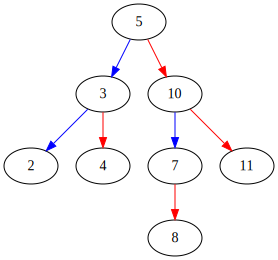

In [11]:
from graphviz import Digraph

def visualize_binary_tree(*, binary_tree: BinaryTree) -> None:
    
    nodes = inorder_traversal(binary_tree=binary_tree)
    
    dot = Digraph()
    for node in nodes:
        
        node_id = f"{id(node)}"
        dot.node(node_id, label=f"{node.value}")
        
        if node.left_child is not None:
            dot.edge(node_id, f"{id(node.left_child)}", color="blue")
            
        if node.right_child is not None:
            dot.edge(node_id, f"{id(node.right_child)}", color="red")

    return dot
    
visualize_binary_tree(binary_tree=binary_tree)  

Let's add `history` feature to track every snapshot of the binary tree (this would not be possible to do as simply with a mutable data structure):

--------------------------------------------------


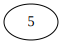

--------------------------------------------------


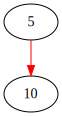

--------------------------------------------------


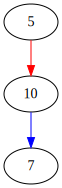

--------------------------------------------------


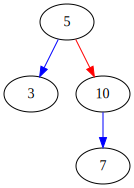

--------------------------------------------------


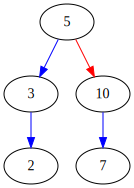

--------------------------------------------------


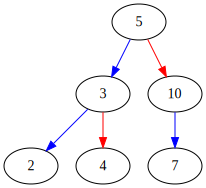

--------------------------------------------------


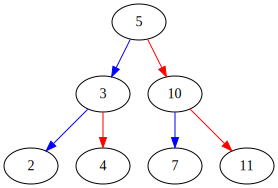

--------------------------------------------------


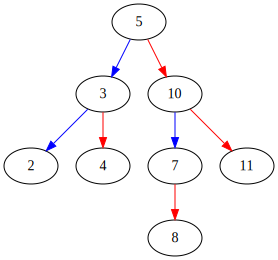

--------------------------------------------------


In [12]:
binary_tree = empty_binary_tree

binary_tree_history = [binary_tree]
for value in values:
    binary_tree = insert_into_binary_tree(binary_tree=binary_tree, value=value)
    binary_tree_history.append(binary_tree)
    
for binary_tree in binary_tree_history:
    display(visualize_binary_tree(binary_tree=binary_tree) )
    print('-' * 50)

Checklist after finishing the notebook:
- Become familiar with use cases and usage of `attr` library
- Be able to create immutable data structures in python and write functional code to modify them